# Cursos de Introdução a classificação com SKLearn

## Aula 03 e aula 04

### Importando as Bibliotecas necessárias

In [72]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Importando os datasets

In [107]:
url = 'https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv'
df = pd.read_csv(url)

### Explorando os dados importados

In [108]:
df.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [4]:
df.shape

(2157, 3)

### Realizando a inversão da coluna unfinished para finished e invertendo os valores

In [5]:
mapa = {0: 1, 1:0}

df['finished'] = df['unfinished'].map(mapa)

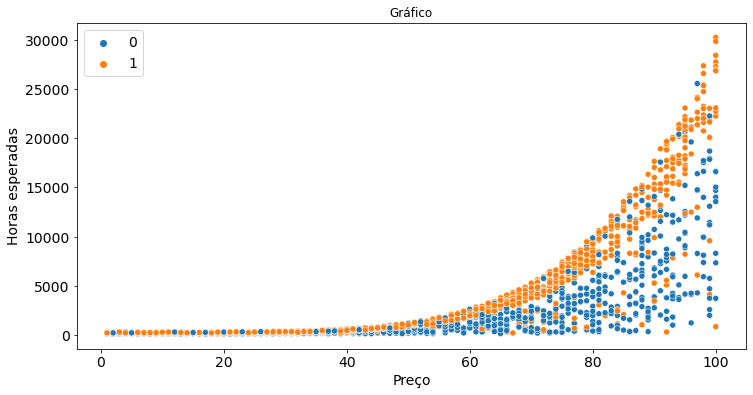

In [6]:
fig, ax = plt.subplots(figsize=(12,6))
ax.set_title('Gráfico')
sns.scatterplot(x='expected_hours', y='price', data=df, ax=ax, hue='finished')
ax.set_xlabel('Preço', fontsize=14)
ax.set_ylabel('Horas esperadas', fontsize=14)
ax.legend(fontsize=14)
ax.tick_params(labelsize=14)

plt.show()

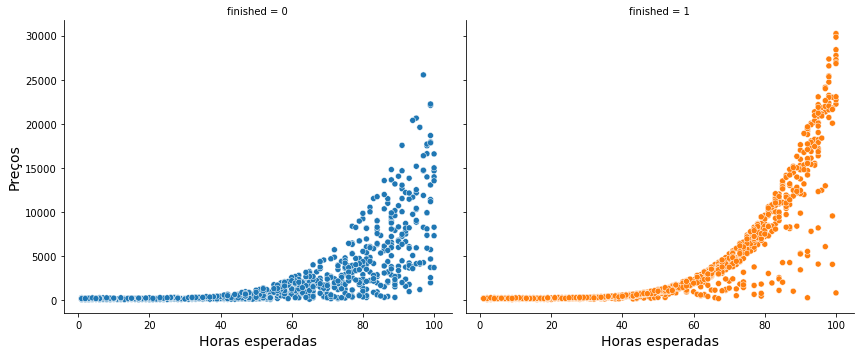

In [7]:
g = sns.FacetGrid(df, col="finished", height=5, aspect=1.2)
g.map(sns.scatterplot, 'expected_hours', 'price', data=df, hue='finished')
g.set_axis_labels("Horas esperadas", "Preços", fontsize=14)

plt.show()

In [8]:
y = df['finished']
X = df[['expected_hours', 'price']]
seed = 20
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed, stratify=y)

In [9]:
modelo = LinearSVC(random_state=20)
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
acuracia = accuracy_score(y_test, y_pred)
print(f'A acurancia do modelo é: {acuracia:0.2%}')

A acurancia do modelo é: 47.41%


C:\Users\guilh\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [10]:
y_baseline = np.ones(len(y_test))
acuracia = accuracy_score(y_test, y_baseline)
print(f'A acurancia do algoritmo de baseline foi {acuracia:0.2%}')

A acurancia do algoritmo de baseline foi 52.59%


In [23]:
x_min = df['expected_hours'].min()
x_max = df['expected_hours'].max()
y_min = df['price'].min()
y_max = df['price'].max()
print(x_min, x_max,y_min,y_max)

1 100 100 30223


In [67]:
pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min)/ pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min)/ pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos

array([[1.000000e+00, 1.000000e+02],
       [1.990000e+00, 1.000000e+02],
       [2.980000e+00, 1.000000e+02],
       ...,
       [9.703000e+01, 2.992177e+04],
       [9.802000e+01, 2.992177e+04],
       [9.901000e+01, 2.992177e+04]])

In [68]:
Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)
Z.shape

(100, 100)

In [69]:
Z

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=int64)

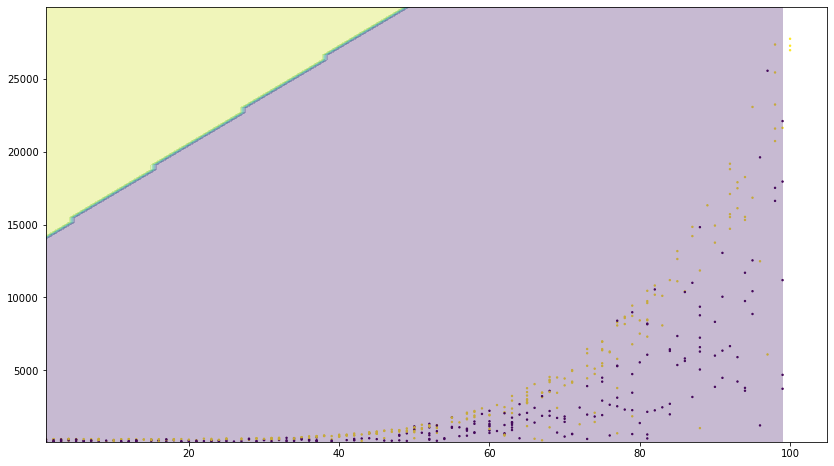

In [70]:
fig, ax = plt.subplots(figsize=(14,8))
ax.scatter(X_test['expected_hours'], X_test['price'], c=y_test, s=2)
ax.contourf(xx, yy, Z, alpha=0.3)

plt.show()

### Aplicando StandardScaler e utilizando um novo estimador também baseado no SVM, o SVC

In [78]:
y = df['finished']
X = df[['expected_hours', 'price']]
seed = 20
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, random_state=seed, stratify=y, test_size=0.25)

scaler = StandardScaler()
scaler.fit(X_train_raw)
X_train = scaler.transform(X_train_raw)
X_test = scaler.transform(X_test_raw)


modelo = SVC(random_state=20)
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
acuracia = accuracy_score(y_test, y_pred)
print(f'A acurancia do modelo é: {acuracia:0.2%}')

A acurancia do modelo é: 70.37%


In [94]:
data_x = X_train[:,0]
data_y = X_train[:,1]

x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()
print(x_min, x_max,y_min,y_max)

-1.7268515859610238 1.7388670645003195 -0.5976598441115906 5.377557432910023


In [98]:
pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min)/ pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min)/ pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)
Z

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int64)

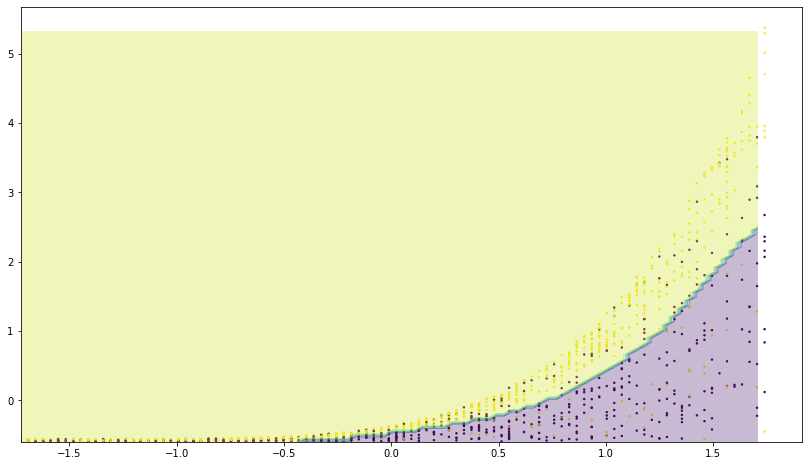

In [100]:
fig, ax = plt.subplots(figsize=(14,8))
ax.scatter(data_x, data_y, c=y_train, s=2)
ax.contourf(xx, yy, Z, alpha=0.3)
plt.show()